In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import warnings
pd.set_option('max_columns', 100)
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)

In [2]:
# Read in the data CSV files
train = pd.read_csv('../input/data-science-bowl-2019/train.csv')
train_labels = pd.read_csv('../input/data-science-bowl-2019/train_labels.csv')
test = pd.read_csv('../input/data-science-bowl-2019/test.csv')
specs = pd.read_csv('../input/data-science-bowl-2019/specs.csv')
# ss = pd.read_csv('../input/data-science-bowl-2019/sample_submission.csv')

In [3]:
print("train.csv shape: ", train.shape)
print("train_labels.csv shape: ", train_labels.shape)
print("test.csv shape: ", test.shape)
print("specs.csv shape: ", specs.shape)

train.csv shape:  (11341042, 11)
train_labels.csv shape:  (17690, 7)
test.csv shape:  (1156414, 11)
specs.csv shape:  (386, 3)


In [4]:
train_ = train.sample(1000000) # sample for efficient plot

## train.csv

- event_id - Randomly generated unique identifier for the event type. Maps to event_id column in specs table.
- game_session - Randomly generated unique identifier grouping events within a single game or video play session.
- timestamp - Client-generated datetime
- event_data - Semi-structured JSON formatted string containing the events parameters. Default fields are: event_count, event_code, and game_time; otherwise fields are determined by the event type.
- installation_id - Randomly generated unique identifier grouping game sessions within a single installed application instance.
- event_count - Incremental counter of events within a game session (offset at 1). Extracted from event_data.
- event_code - Identifier of the event 'class'. Unique per game, but may be duplicated across games. E.g. event code '2000' always identifies the 'Start Game' event for all games. Extracted from event_data.
- game_time - Time in milliseconds since the start of the game session. Extracted from event_data.
- title - Title of the game or video.
- type - Media type of the game or video. Possible values are: 'Game', 'Assessment', 'Activity', 'Clip'.
- world - The section of the application the game or video belongs to. Helpful to identify the educational curriculum goals of the media. Possible values are: 'NONE' (at the app's start screen), TREETOPCITY' (Length/Height), 'MAGMAPEAK' (Capacity/Displacement), 'CRYSTALCAVES' (Weight).

In [5]:
train.head(10)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":...",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":...",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK
7,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,"{""coordinates"":{""x"":250,""y"":665,""stage_width"":...",0001e90f,6,4070,11255,Sandcastle Builder (Activity),Activity,MAGMAPEAK
8,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,"{""coordinates"":{""x"":279,""y"":629,""stage_width"":...",0001e90f,7,4070,11689,Sandcastle Builder (Activity),Activity,MAGMAPEAK
9,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,"{""coordinates"":{""x"":839,""y"":654,""stage_width"":...",0001e90f,8,4070,12272,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [7]:
train.describe()

,event_count,event_code,game_time
count,1.134104e+07,1.134104e+07,1.134104e+07
mean,1.056642e+02,3.513838e+03,1.976236e+05
std,1.483477e+02,6.816470e+02,1.803968e+06
min,1.000000e+00,2.000000e+03,0.000000e+00
25%,2.500000e+01,3.021000e+03,3.061800e+04
50%,6.100000e+01,4.020000e+03,7.276100e+04
75%,1.290000e+02,4.035000e+03,1.574460e+05
max,3.368000e+03,5.010000e+03,3.069102e+08


In [8]:
# to check if event_id & game_session are randomly gegerated
train['event_id_as_int'] = train['event_id'].apply(lambda x: int(x, 16))
train['game_session_as_int'] = train['game_session'].apply(lambda x: int(x, 16))

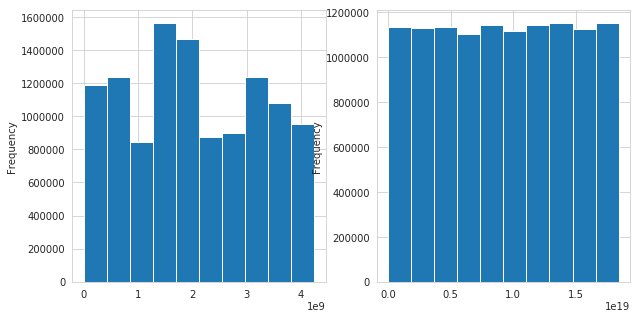

In [9]:
# However, nothing intertesting is showed.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train['event_id_as_int'].plot(kind="hist")
plt.subplot(1,2,2)
train['game_session_as_int'].plot(kind="hist")

In [10]:
# Format and make date / hour features
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name
# Same for test
test['timestamp'] = pd.to_datetime(test['timestamp'])
test['date'] = test['timestamp'].dt.date
test['hour'] = test['timestamp'].dt.hour
test['weekday_name'] = test['timestamp'].dt.weekday_name

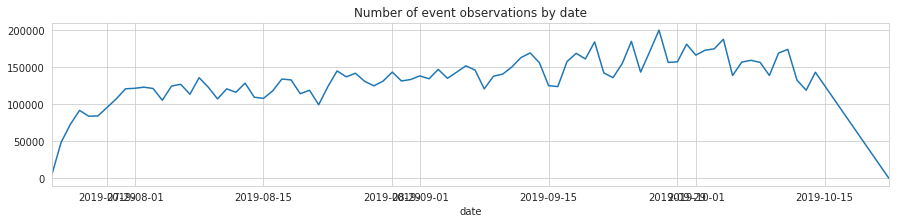

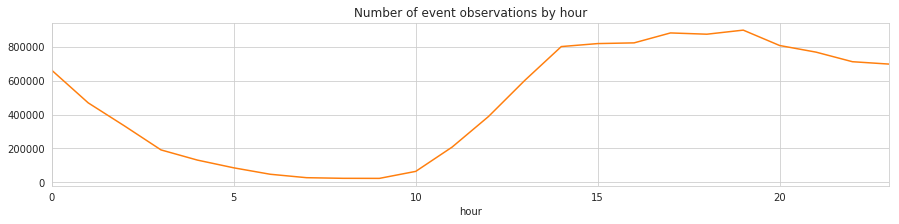

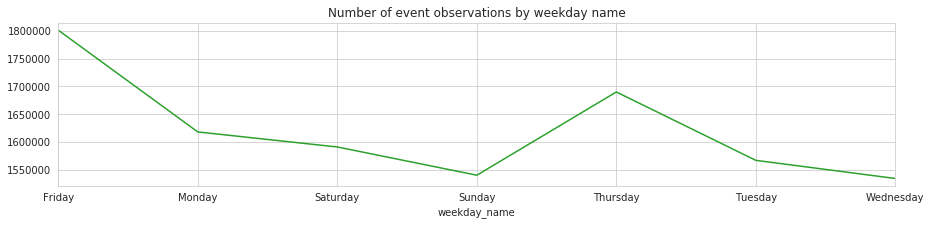

In [11]:
train.groupby('date')['event_id'].agg('count').plot(figsize=(15,3), title="Number of event observations by date", color=my_pal[0])
plt.show()
train.groupby('hour')['event_id'].agg('count').plot(figsize=(15,3), title="Number of event observations by hour", color=my_pal[1])
plt.show()
train.groupby('weekday_name')['event_id'].agg('count').plot(figsize=(15,3), title="Number of event observations by weekday name", color=my_pal[2])
plt.show()

In [12]:
# event data: which seems to have the most interesting information, however, considering the RAM limit, it's necessary to exract only the influential information.
print(train["event_data"][4])
print(train["event_data"][5])

{"description":"Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!","identifier":"Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape","media_type":"audio","duration":6919,"event_count":3,"game_time":6972,"event_code":3110}
{"coordinates":{"x":583,"y":605,"stage_width":1015,"stage_height":762},"event_count":4,"game_time":9991,"event_code":4070}


In [13]:
# installation_id
train["installation_id"].nunique()

17000

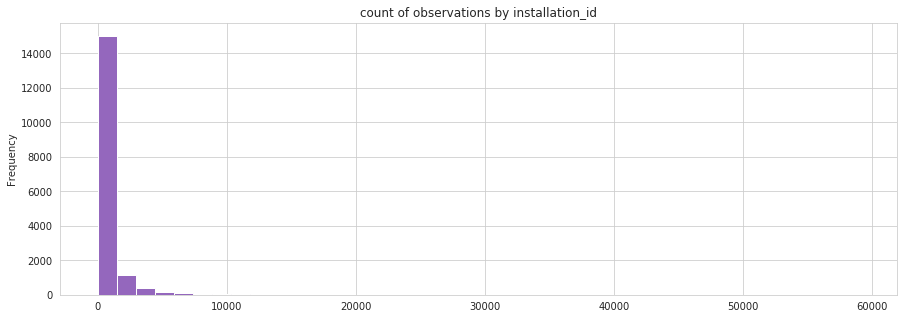

In [14]:
train.groupby('installation_id').count()['event_id'].plot(kind="hist",
          bins=40,
          color=my_pal[4],
          figsize=(15, 5), title="count of observations by installation_id")

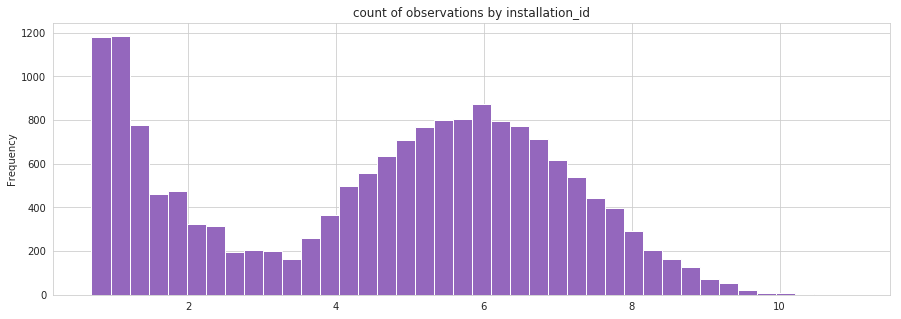

In [15]:
# take log transformation because the original data looks skewed
train.groupby('installation_id').count()['event_id'].apply(np.log1p).plot(kind="hist",
          bins=40,
          color=my_pal[4],
          figsize=(15, 5), title="count of observations by installation_id")

In [16]:
# what is the highest number of cases of installation_id
train['installation_id'].value_counts().head(3)

f1c21eda    58988
4d7d3d97    32749
d25338cb    31826
Name: installation_id, dtype: int64

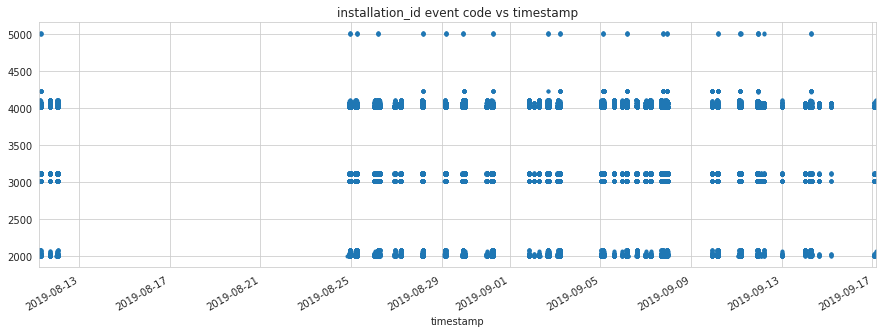

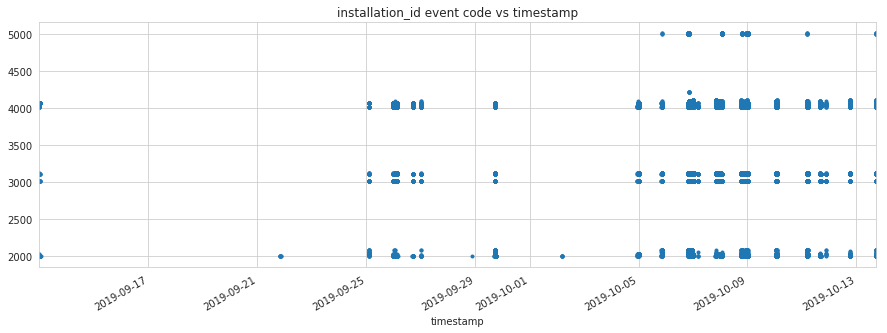

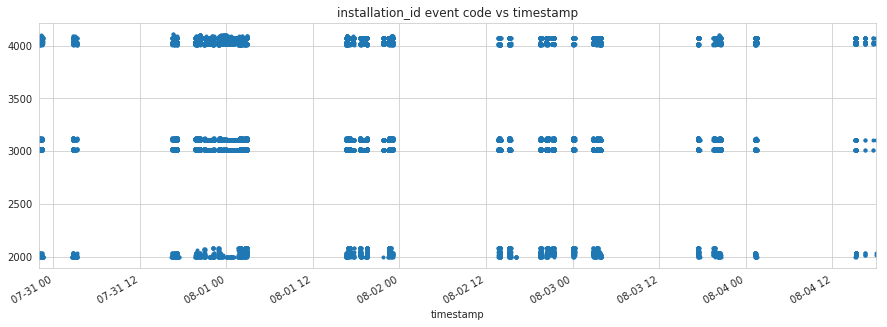

In [17]:
train.query('installation_id == "f1c21eda"').set_index("timestamp")["event_code"].plot(figsize=(15,5), title="installation_id event code vs timestamp", style=".")
plt.show()
train.query('installation_id == "4d7d3d97"').set_index("timestamp")["event_code"].plot(figsize=(15,5), title="installation_id event code vs timestamp", style=".")
plt.show()
train.query('installation_id == "d25338cb"').set_index("timestamp")["event_code"].plot(figsize=(15,5), title="installation_id event code vs timestamp", style=".")
plt.show()

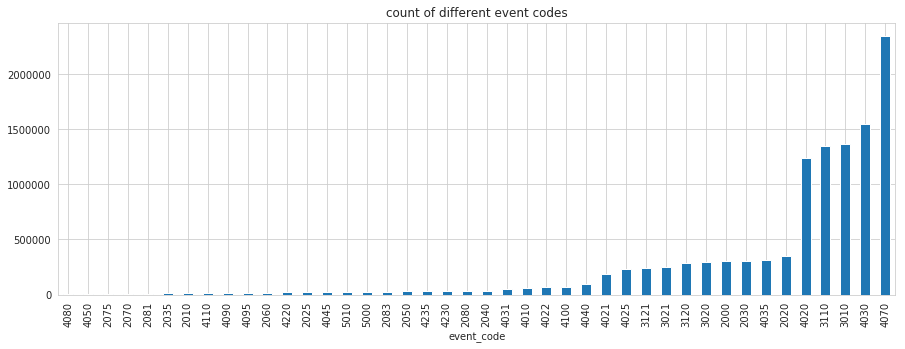

In [18]:
# event_code: looks loke dictionary format but string
train.groupby("event_code").count()["event_id"].sort_values().plot(kind="bar", figsize=(15,5), title="count of different event codes")

4070 and 4030 always come with coordinates (x, y) adn stage_width
possibly they could be marking achievement or something related to position on the screen. These events look like this
- {"coordinates":{"x":583,"y":605,"stage_width":1015,"stage_height":762},"event_count":4,"game_time":9991,"event_code":4070}


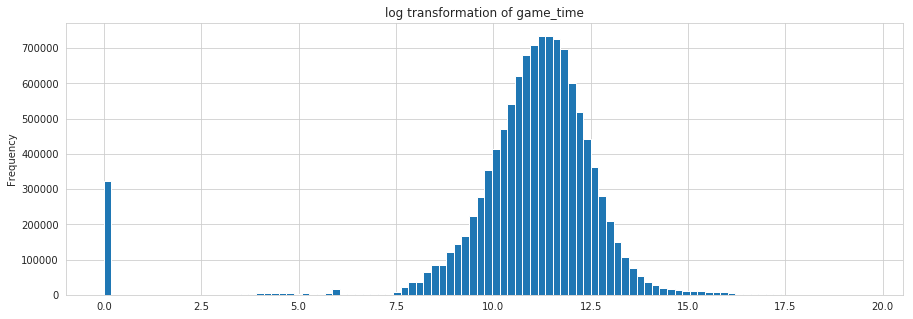

In [19]:
# game_time: almost similar to normal distribution
train["game_time"].apply(np.log1p).plot(kind="hist", figsize=(15,5), bins=100, title="log transformation of game_time")

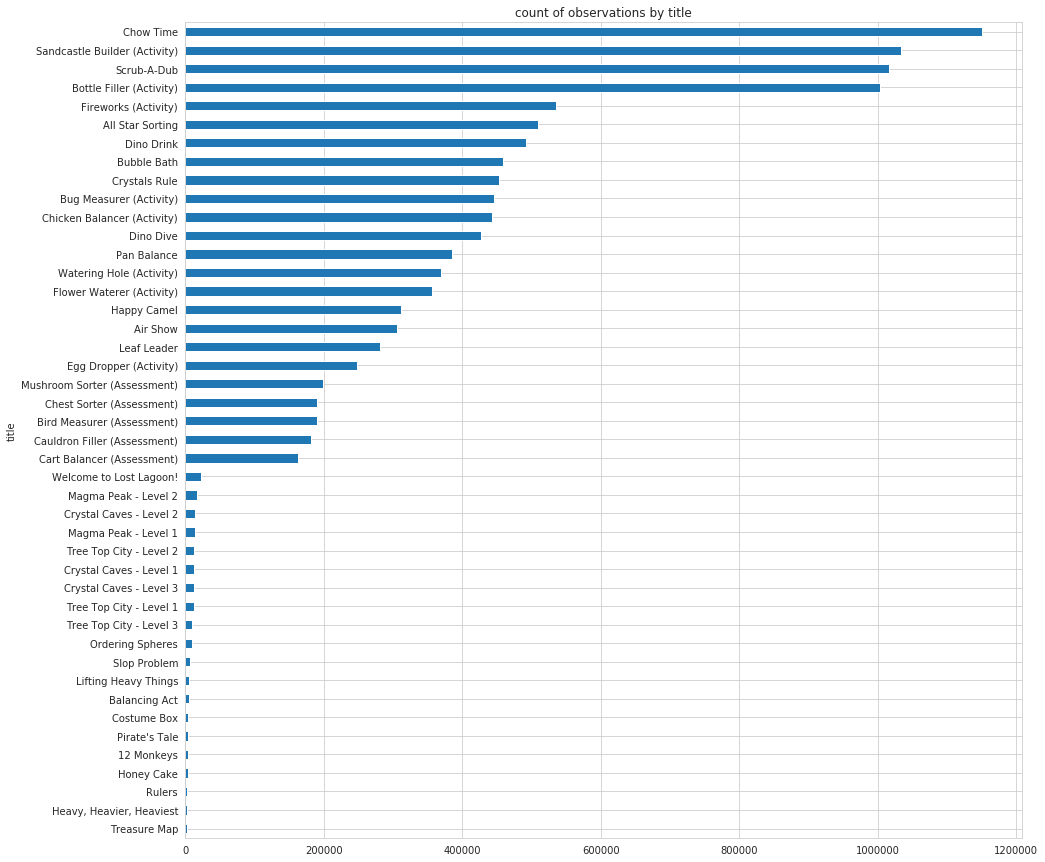

In [20]:
# game/video titles
train.groupby("title")["event_id"].count().sort_values().plot(kind="barh", title="count of observations by title", figsize=(15,15))

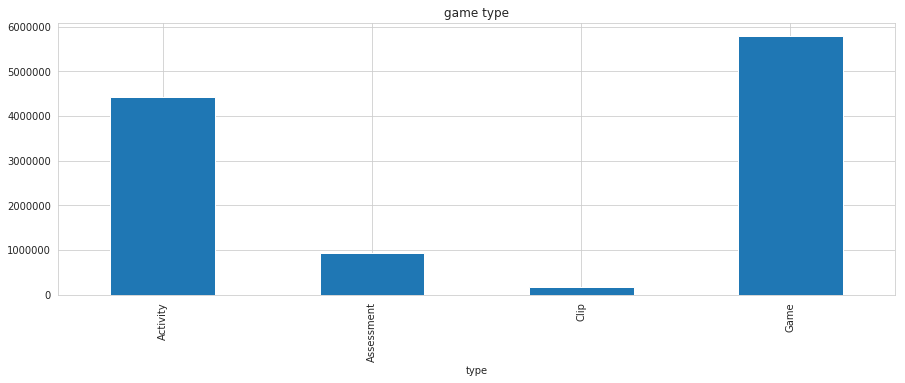

In [21]:
# game type
train.groupby("type").count()["event_id"].plot(kind="bar", figsize=(15,5), title = "game type")

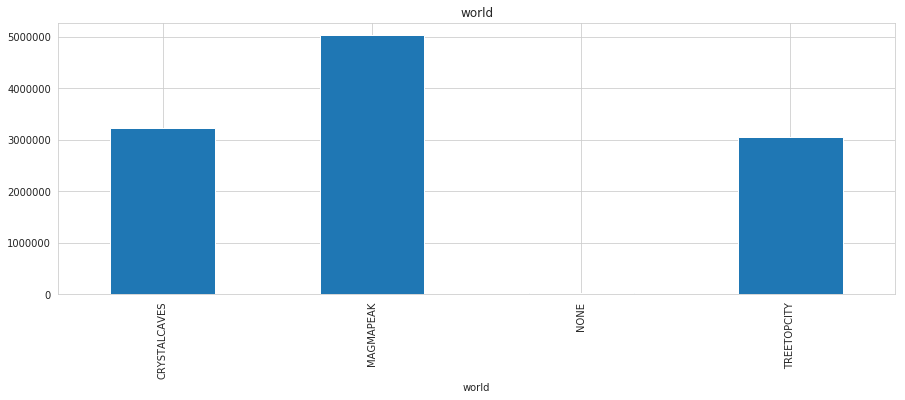

In [22]:
# world 
train.groupby("world").count()["event_id"].plot(kind="bar", figsize=(15,5), title = "world")

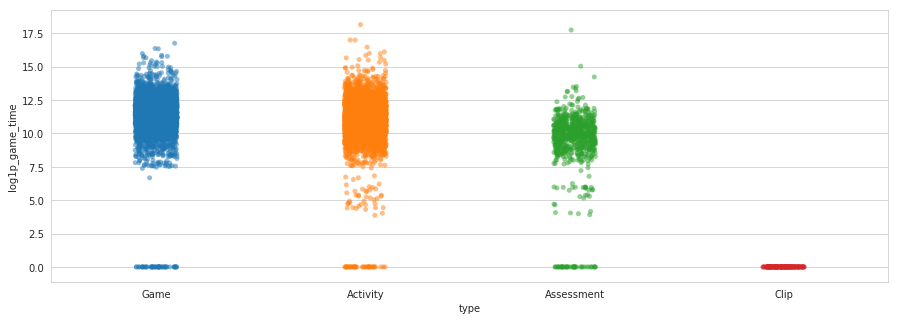

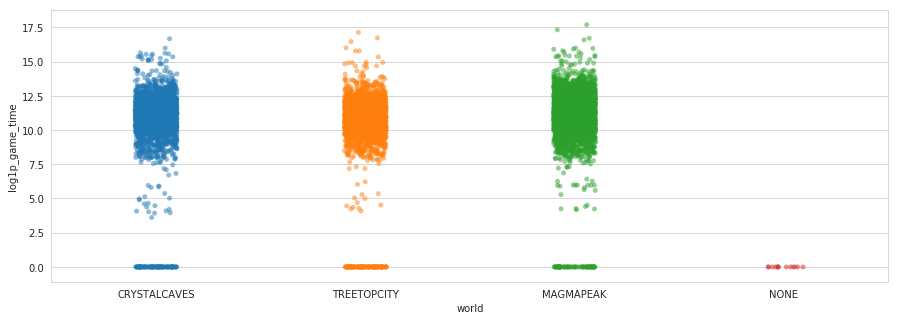

In [23]:
train["log1p_game_time"] = train["game_time"].apply(np.log1p)
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="type", y = "log1p_game_time", data=train.sample(10000), alpha=0.5, ax=ax)
plt.close()
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="world", y="log1p_game_time", data=train.sample(10000), alpha=0.5, ax=ax)
plt.close()

# train_label.csv

In [24]:
train_labels.head(5)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [25]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [26]:
train_labels.describe() # accuracy group is what we want to predict.

,num_correct,num_incorrect,accuracy,accuracy_group
count,17690.000000,17690.000000,17690.000000,17690.000000
mean,0.760938,1.587790,0.595810,1.885585
std,0.426523,3.058295,0.430559,1.256796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.111111,1.000000
50%,1.000000,0.500000,0.750000,2.500000
75%,1.000000,2.000000,1.000000,3.000000
max,1.000000,85.000000,1.000000,3.000000


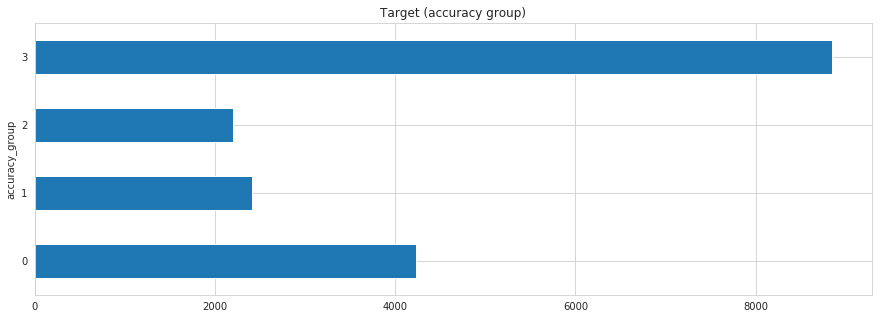

In [27]:
# target
train_labels.groupby('accuracy_group')['game_session'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuracy group)')
plt.show()

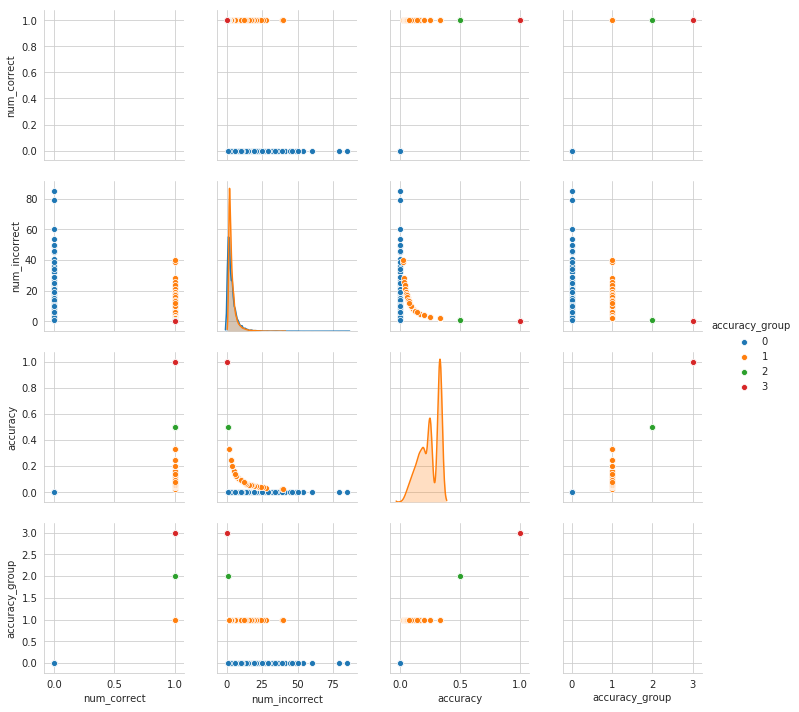

In [28]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()

# specs.csv

In [29]:
specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 3 columns):
event_id    386 non-null object
info        386 non-null object
args        386 non-null object
dtypes: object(3)
memory usage: 9.2+ KB


In [30]:
specs.describe()

,event_id,info,args
count,386,386,386
unique,386,168,191
top,bdf49a58,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
freq,1,17,25


In [31]:
specs.head(5)

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


# Data refinement

In [32]:
# First Attempt... still working to fully understand the problem
from sklearn.model_selection import train_test_split

# Define cleared or not cleared
# 
train['cleared'] = True
train.loc[train['event_data'].str.contains('false') & train['event_code'].isin([4100, 4110]), 'cleared'] = False

test['cleared'] = True
test.loc[test['event_data'].str.contains('false') & test['event_code'].isin([4100, 4110]), 'cleared'] = False

aggs = {'hour': ['max','min','mean'],
        'cleared': ['mean']}

train_aggs = train.groupby('installation_id').agg(aggs)
test_aggs = test.groupby('installation_id').agg(aggs)
train_aggs = train_aggs.reset_index()
test_aggs = test_aggs.reset_index()
train_aggs.columns = ['_'.join(col).strip() for col in train_aggs.columns.values]
test_aggs.columns = ['_'.join(col).strip() for col in test_aggs.columns.values]
train_aggs = train_aggs.rename(columns={'installation_id_' : 'installation_id'})

# Hmmm... not 1:1 the row of train_aggs and train_labels is different
final_train = train_aggs.merge(train_labels[['installation_id','accuracy_group']],
                 how='left')

In [33]:
final_train[final_train.accuracy_group >= 0].reset_index(drop=True)

,installation_id,hour_max,hour_min,hour_mean,cleared_mean,accuracy_group
0,0006a69f,20,4,11.927124,0.995527,3.0
1,0006a69f,20,4,11.927124,0.995527,0.0
2,0006a69f,20,4,11.927124,0.995527,3.0
3,0006a69f,20,4,11.927124,0.995527,2.0
4,0006a69f,20,4,11.927124,0.995527,3.0
...,...,...,...,...,...,...
17685,ffc90c32,21,0,7.934132,0.999002,3.0
17686,ffd2871d,13,0,4.546122,0.999592,3.0
17687,ffeb0b1b,22,1,15.774639,0.996861,1.0
17688,ffeb0b1b,22,1,15.774639,0.996861,0.0
